## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [89]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [24]:

df = pd.read_csv('/content/sample_data/champignons.csv')
df.info()
print("\nNombre de champignons toxiques: ", (df['toxicite'] == 'toxique').sum())
print("\nNombre de champignons combestibles: ", (df['toxicite'] == 'comestible').sum())
print("\nNombre de valeurs nulles: ", df.isnull().sum().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   toxicite                 8124 non-null   object
 1   surface-chapeau          8124 non-null   object
 2   ecchymoses               8124 non-null   object
 3   attache-lamelles         8124 non-null   object
 4   taille-lamelles          8124 non-null   object
 5   forme-pied               8124 non-null   object
 6   surface-pied-sur-anneau  8124 non-null   object
 7   couleur-pied-sur-anneau  8124 non-null   object
 8   couleur-voile            8124 non-null   object
 9   type-anneau              8124 non-null   object
 10  population               8124 non-null   object
dtypes: object(11)
memory usage: 698.3+ KB

Nombre de champignons toxiques:  3916

Nombre de champignons combestibles:  4208

Nombre de valeurs nulles:  0


,toxicite,surface-chapeau,ecchymoses,attache-lamelles,taille-lamelles,forme-pied,surface-pied-sur-anneau,couleur-pied-sur-anneau,couleur-voile,type-anneau,population
0,toxique,lisse,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
1,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
2,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
3,toxique,écaillée,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
4,comestible,lisse,non,libre,large,effilé,lisse,blanc,blanc,évasé,abondante


1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [37]:
enc = preprocessing.OneHotEncoder(sparse_output=False, dtype=int, handle_unknown="ignore")
data = enc.fit_transform(df)
features_name = enc.get_feature_names_out(df.columns)

print("Taille (lignes x colonnes): ", data.shape)
print("\nNoms de colonnes générées: ")
print(features_name)

Taille (lignes x colonnes):  (8124, 42)

Noms de colonnes générées: 
['toxicite_comestible' 'toxicite_toxique' 'surface-chapeau_fibreuse'
 'surface-chapeau_lisse' 'surface-chapeau_rainurée'
 'surface-chapeau_écaillée' 'ecchymoses_non' 'ecchymoses_oui'
 'attache-lamelles_adhérent' 'attache-lamelles_libre'
 'taille-lamelles_large' 'taille-lamelles_étroit' 'forme-pied_effilé'
 'forme-pied_élargissant' 'surface-pied-sur-anneau_fibreuse'
 'surface-pied-sur-anneau_lisse' 'surface-pied-sur-anneau_soyeuse'
 'surface-pied-sur-anneau_écaillée' 'couleur-pied-sur-anneau_beige'
 'couleur-pied-sur-anneau_blanc' 'couleur-pied-sur-anneau_brun'
 'couleur-pied-sur-anneau_cannelle' 'couleur-pied-sur-anneau_gris'
 'couleur-pied-sur-anneau_jaune' 'couleur-pied-sur-anneau_orange'
 'couleur-pied-sur-anneau_rose' 'couleur-pied-sur-anneau_rouge'
 'couleur-voile_blanc' 'couleur-voile_brun' 'couleur-voile_jaune'
 'couleur-voile_orange' 'type-anneau_aucun' 'type-anneau_fibreux'
 'type-anneau_large' 'type-anneau_p

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [39]:
enc_df = pd.DataFrame(data, columns=features_name, index=df.index)
enc_df = enc_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(enc_df.shape)
enc_df.head()

(8124, 42)


,toxicite_comestible,toxicite_toxique,surface-chapeau_fibreuse,surface-chapeau_lisse,surface-chapeau_rainurée,surface-chapeau_écaillée,ecchymoses_non,ecchymoses_oui,attache-lamelles_adhérent,attache-lamelles_libre,...,type-anneau_fibreux,type-anneau_large,type-anneau_pendant,type-anneau_évasé,population_abondante,population_clairsemée,population_dispersée,population_nombreuse,population_solitaire,population_variée
0,1,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [46]:
# On sépare le label des features
y = enc_df["toxicite_toxique"] # Une colonne car classification binaire
X = enc_df.drop(columns=["toxicite_toxique", "toxicite_comestible"])
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)

print("X_train:", X_train.shape, "X_dev:", X_dev.shape)
print("y_train:", y_train.shape, "y_dev:", y_dev.shape)

X_train: (5686, 40) X_dev: (2438, 40)
y_train: (5686,) y_dev: (2438,)


## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

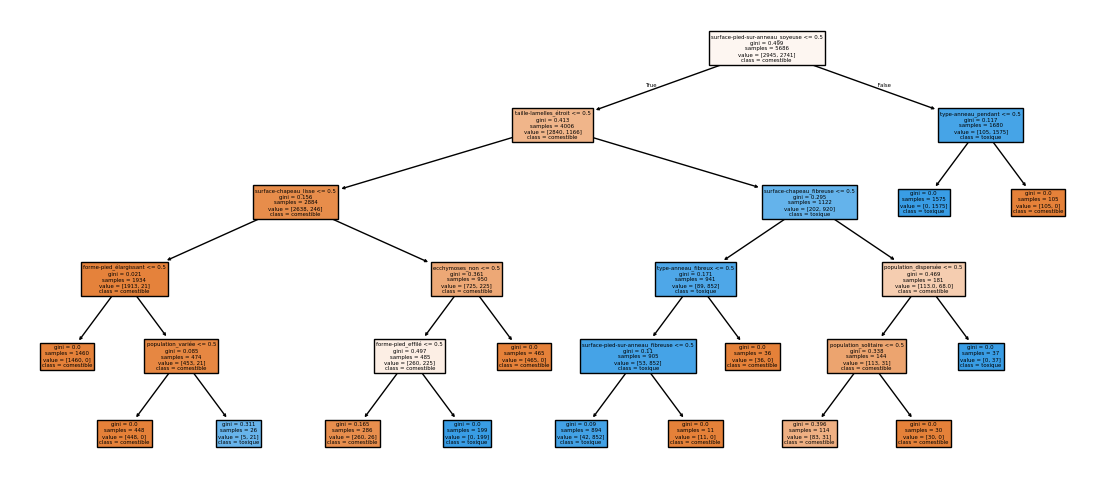

In [80]:
import matplotlib.pyplot as plt

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(14, 6))
plot_tree(tree_clf, feature_names=X_train.columns, class_names=["comestible", "toxique"], filled=True)
plt.show()

2.2 Afficher l'arbre obtenu en utilisant graphwiz

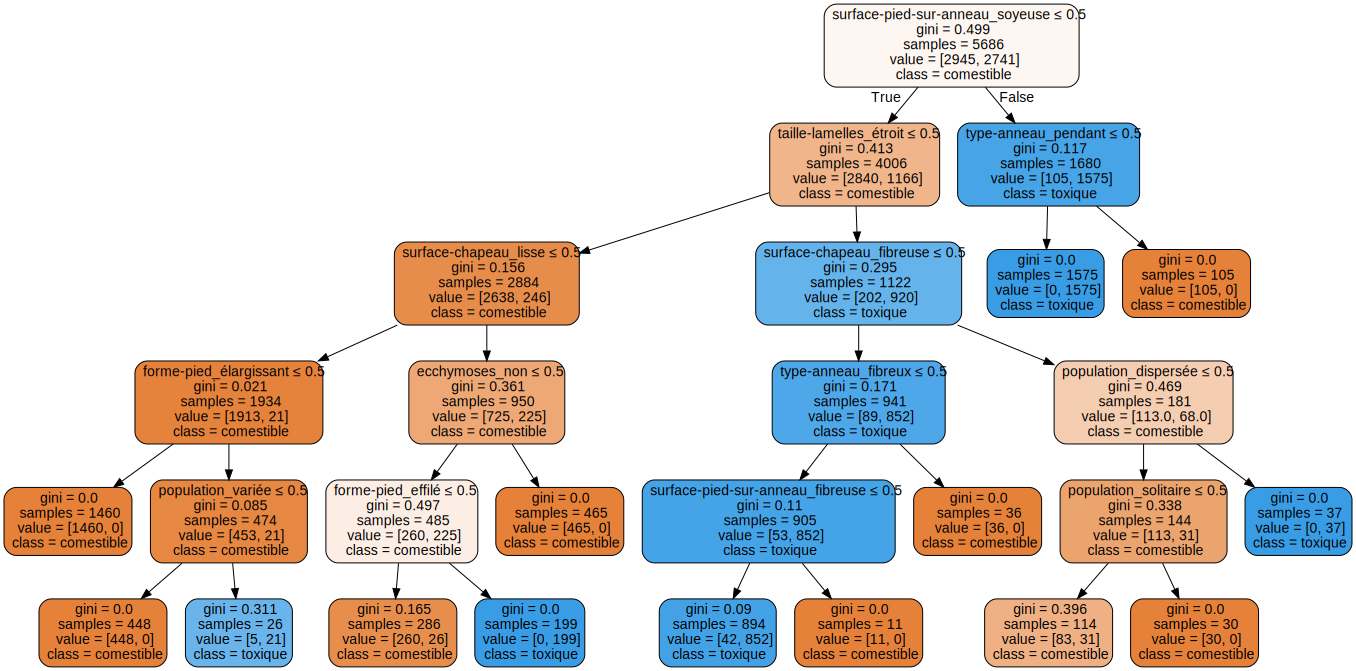

In [85]:
dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["comestible", "toxique"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("arbre_decision")
graph

2.3 Mesurer la précision du modèle sur les données de dev

In [88]:
y_pred = tree_clf.predict(X_dev)
acc = accuracy_score(y_dev, y_pred)
print("Précision du modèle de dev: ", acc)

Précision du modèle de dev : 0.9803117309269893


## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [90]:
rf = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=500, n_jobs=-1,
                       random_state=42)

3.2 Afficher trois arbres au hasard.

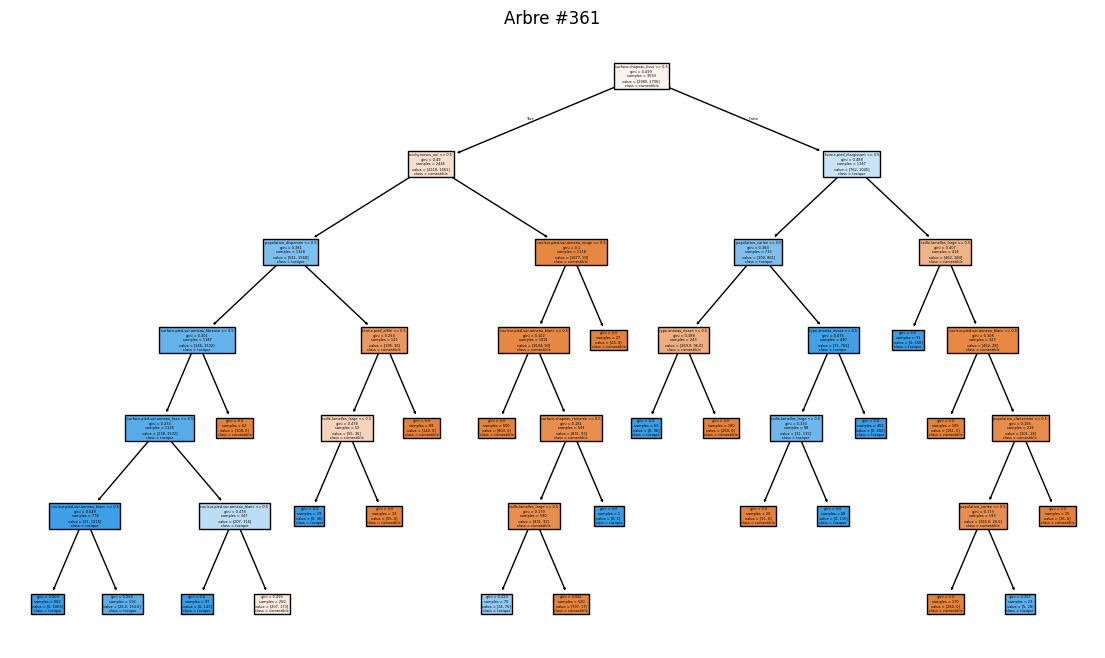

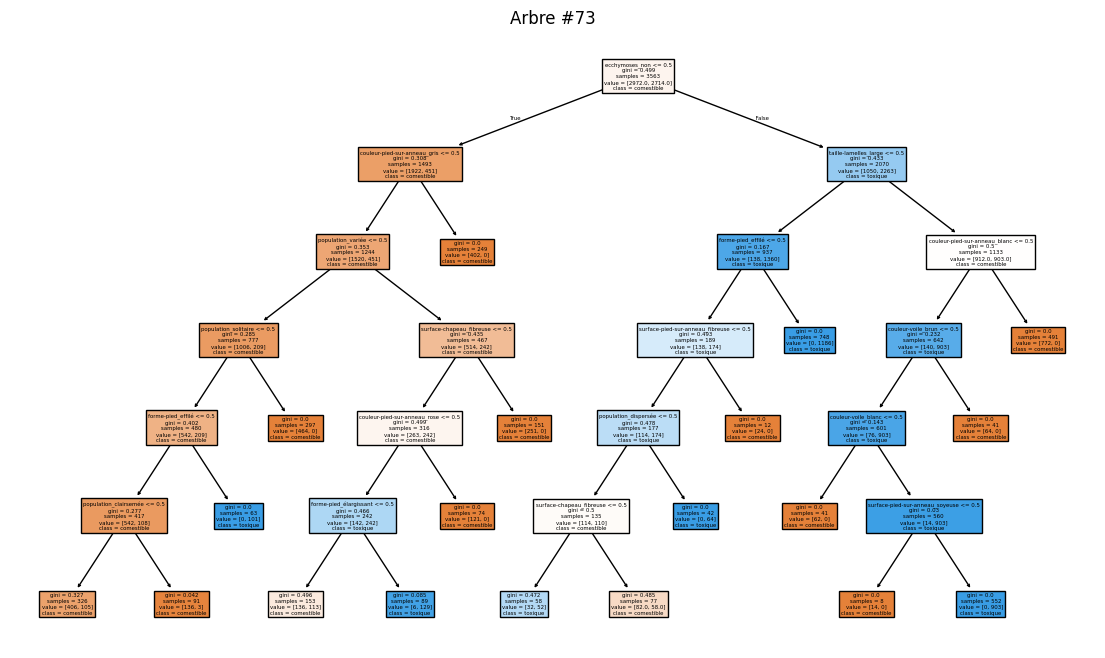

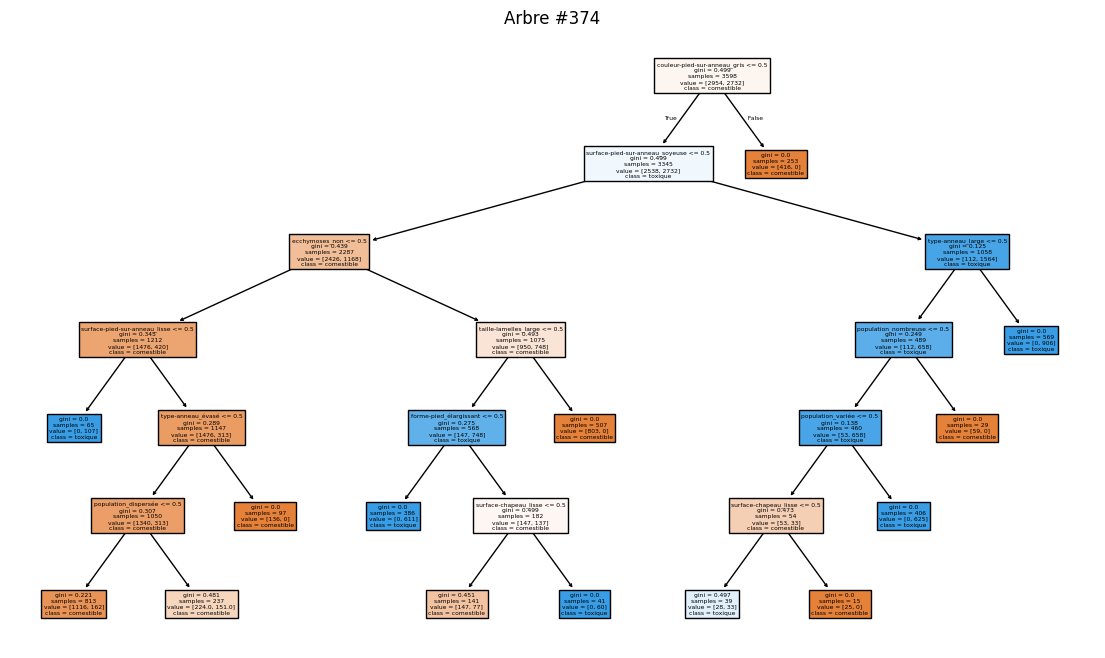

In [93]:
from random import randint

rng = np.random.RandomState(42)
idx = rng.choice(len(rf.estimators_), size=3, replace=False)

for i, k in enumerate(idx, start=1):
    plt.figure(figsize=(14, 8))
    plot_tree(
        rf.estimators_[k],
        feature_names=X_train.columns,
        class_names=["comestible", "toxique"],
        filled=True,
        max_depth=6
    )
    plt.title(f"Arbre #{k}")
    plt.show()


3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [95]:
y_pred_rf = rf.predict(X_dev)
acc = accuracy_score(y_dev, y_pred_rf)
print("Précision du modèle Random Forest: ", acc)

Précision du modèle Random Forest:  0.9643150123051681


## 4. optimisation des paramètres

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison max_depth et n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [98]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Grille d'exploration (adapte si besoin)
param_grid = {
    "max_depth": [4, 6, 8, 10],
    "n_estimators": [100, 300, 500, 800]
}

# Modèle de base (autres params fixés)
base_rf = ensemble.RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=0,
    refit=True   # refit automatiquement sur tout X_train avec les meilleurs params
)

grid.fit(X_train, y_train)

print("Meilleurs paramètres (CV) :", grid.best_params_)
print("Meilleure précision moyenne CV :", round(grid.best_score_, 4))

# Meilleur modèle ré-entraîné (déjà fait via refit=True)
best_rf = grid.best_estimator_

Meilleurs paramètres (CV) : {'max_depth': 10, 'n_estimators': 100}
Meilleure précision moyenne CV : 0.9917


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

In [99]:
y_pred_dev = best_rf.predict(X_dev)
acc_dev = accuracy_score(y_dev, y_pred_dev)
print("Précision du meilleur modèle sur dev :", round(acc_dev, 4))


Précision du meilleur modèle sur dev : 0.991


4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

In [100]:
# Importances en %
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns) * 100
importances = importances.sort_values(ascending=False)

important_feats = importances[importances > 1.0]
print("Caractéristiques avec importance > 1% :")
print(important_feats.round(2))

# (optionnel) vérifier que la somme fait ~100%
print("Somme des importances (%):", round(importances.sum(), 2))


Caractéristiques avec importance > 1% :
taille-lamelles_étroit              10.73
taille-lamelles_large               10.68
surface-pied-sur-anneau_soyeuse      8.40
type-anneau_pendant                  6.65
ecchymoses_non                       6.39
population_variée                    6.29
surface-pied-sur-anneau_lisse        5.55
ecchymoses_oui                       5.12
type-anneau_large                    4.92
forme-pied_effilé                    4.53
forme-pied_élargissant               3.88
surface-chapeau_lisse                3.80
couleur-pied-sur-anneau_blanc        3.54
type-anneau_évasé                    2.84
surface-pied-sur-anneau_fibreuse     2.83
population_dispersée                 2.67
surface-chapeau_fibreuse             1.82
population_solitaire                 1.74
surface-chapeau_écaillée             1.43
population_abondante                 1.25
dtype: float64
Somme des importances (%): 100.0


## 5. Stacking

Essayer différents modèles d'estimateur final

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier


## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

## 7. (Optionnel) Recommencer les exercices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?